# AHJIN STUDIOS: Box Office Success Blueprint

## Project Overview

Ahjin Studios is taking a bold leap into the world of original video content. With major players in the industry producing record-breaking films, it's time we carve our own path to the silver screen. But before the cameras roll, we need to ground our creativity in strategy. This project explores which types of films are dominating the box office - genres, themes, release seasons, production budgets, and more - to identify what’s *actually working* in today’s film market.

## Business Problem

The entertainment industry is undergoing a massive transformation. Streaming giants and traditional studios alike are pouring billions into original content, resulting in a saturated, competitive, and fast-evolving market. Ahjin Studios, a newcomer in this arena, wants to make a strong, strategic entrance. But without prior experience in filmmaking or content production, the studio lacks a grounded understanding of what drives box office success.

While creativity is the soul of cinema, data is its compass. The financial risk of producing a film is substantial, with production budgets often ranging from millions to hundreds of millions of dollars — and no guaranteed return. Choosing the wrong genre, misreading audience interests, or releasing at the wrong time can spell disaster. Conversely, aligning a film's concept with market demand can lead to runaway hits, brand recognition, and long-term profitability.

Ahjin Studios needs clear, evidence-based insights to answer critical questions:

- What types of movies are **worth betting on**?
- Where can we find the **sweet spot between budget and revenue**?
- Which trends are **passing fads**, and which are **sustainable opportunities**?
- How can a **new studio** stand out in a market dominated by legacy franchises and big-name talent?

By conducting a comprehensive analysis of recent box office performance, this project aims to **remove the guesswork** from movie production decisions and provide Ahjin Studios with a **strategic blueprint** for launching commercially viable, audience-ready films that can hold their own in today’s high-stakes entertainment landscape.

## Objective

To analyze recent box office trends and translate key findings into **actionable, data-driven recommendations** that will guide Ahjin Studios in developing high-performing original films.

## Key Questions

- Which **genres** are consistently earning the highest revenue?
- What **budget range** yields the best ROI?
- How do **release dates** affect performance?
- Do **star power** and **director reputation** play a measurable role?
- Are **franchise films** outperforming standalones?
- What **audience demographics** are driving ticket sales?

## Deliverables

- A clean and exploratory dataset analysis of recent box office films
- Visual breakdowns of top-performing genres, budgets, and seasons
- A concise summary report with **strategic recommendations** for Ahjin Studios

## Final Goal

To provide the leadership team at Ahjin Studios with a **clear roadmap for movie production** - one that maximizes commercial success while carving out a unique space in the entertainment industry.

> Lights, camera... data! Let's get to work.

## INITIAL DATA UNDERSTANDING

### 1. BUDGET DATASET

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [302]:
# Load the dataset
budget_df = pd.read_csv(r'..\Raw_Data\tn.movie_budgets.csv', encoding = 'Latin1')
budget_df.head() 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [303]:
# Display the shape
print(f"The dataset has {budget_df.shape[0]} rows and {budget_df.shape[1]} columns.")

The dataset has 5782 rows and 6 columns.


In [304]:
# Display column names
budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [305]:
# Get metadata
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [306]:
# Display descriptive statistics for categorical columns
budget_df.describe(include = 'O').T

,count,unique,top,freq
release_date,5782,2418,"Dec 31, 2014",24
movie,5782,5698,Halloween,3
production_budget,5782,509,"$20,000,000",231
domestic_gross,5782,5164,$0,548
worldwide_gross,5782,5356,$0,367


In [307]:
# Check for duplicates and null values
print("Duplicates:", budget_df.duplicated().sum())
print("\nNull Values:\n", budget_df.isna().sum())

Duplicates: 0

Null Values:
 id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


### 2. GROSS DATASET

In [308]:
# Load gross dataset
gross_df = pd.read_csv(r'..\Raw_Data\bom.movie_gross.csv')
gross_df.head() 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [309]:
# Display the shape 
print(f"The dataset has {gross_df.shape[0]} rows and {gross_df.shape[1]} columns.")

The dataset has 3387 rows and 5 columns.


In [310]:
# Get metadata 
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [311]:
# Get basic statistics for numerical columns
gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [312]:
# Get basic statistics for categorical columns
gross_df.describe(include = 'O').T

,count,unique,top,freq
title,3387,3386,Bluebeard,2
studio,3382,257,IFC,166
foreign_gross,2037,1204,1200000,23


In [313]:
# Check for duplicates and null values
print("Duplicates:", gross_df.duplicated().sum())
print("\nNull Values:\n", gross_df.isna().sum())

Duplicates: 0

Null Values:
 title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


### 5. TMDB MOVIES DATASET

In [314]:
# Load TMDB movies dataset
tmdb_df = pd.read_csv(r'..\Raw_Data\tmdb.movies.csv', index_col = 0)
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [315]:
# Display the shape
print(f'The dataset has {tmdb_df.shape[0]} rows and {tmdb_df.shape[1]} columns.')

The dataset has 26517 rows and 9 columns.


In [316]:
# Display column names
tmdb_df.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [317]:
# Get metadata
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [318]:
# Display descriptive statistics for numerical columns
tmdb_df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [319]:
# Display descriptive statistics for categorical columns
tmdb_df.describe(include = 'O').T

,count,unique,top,freq
genre_ids,26517,2477,[99],3700
original_language,26517,76,en,23291
original_title,26517,24835,Eden,7
release_date,26517,3433,2010-01-01,269
title,26517,24688,Eden,7


In [320]:
# Check for duplicates and null values
print('Duplicates:', tmdb_df.duplicated().sum())
print('\nNull Values:\n', tmdb_df.isna().sum())

Duplicates: 1020

Null Values:
 genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


### ROTTEN TOMATOES MOVIES INFORMATION DATASET

In [321]:
# Load dataset
rt_movies_df = pd.read_csv(r"..\Raw_Data\rt.movie_info.tsv", sep = '\t')
rt_movies_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [322]:
# Get dataset shape
print(f"The dataset has {rt_movies_df.shape[0]} rows and {rt_movies_df.shape[1]} columns")

The dataset has 1560 rows and 12 columns


In [323]:
# Display column names
rt_movies_df.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [324]:
# Get metadata
rt_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [325]:
# Get basic statistical information for categorical columns
rt_movies_df.describe(include = 'O').T

,count,unique,top,freq
synopsis,1498,1497,A group of air crash survivors are stranded in...,2
rating,1557,6,R,521
genre,1552,299,Drama,151
director,1361,1125,Steven Spielberg,10
writer,1111,1069,Woody Allen,4
theater_date,1201,1025,"Jan 1, 1987",8
dvd_date,1201,717,"Jun 1, 2004",11
currency,340,1,$,340
box_office,340,336,"600,000",2
runtime,1530,142,90 minutes,72


In [326]:
print("Duplicates:", rt_movies_df.duplicated().sum())
print("\nNull Values:\n", rt_movies_df.isna().sum())

Duplicates: 0

Null Values:
 id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


## OBSERVATIONS AND EARLY INSIGHTS

We conducted an Initial Data Exploration (IDE) across the five key datasets powering our movie analytics project. The goal was to understand data structure, completeness, and quality before diving into cleaning or modeling. Below is a summary of our early findings:

### 1. **Movie Budgets Dataset**
- **Rows × Columns**: 5,782 × 6  
- **Key Columns**: 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross'
- **Highlights**:
  - No missing values - dataset is fully complete.
  - All monetary fields are stored as strings (e.g., "$100,000,000") and need conversion to numeric types.
  - Over 500 movies show $0 in 'domestic_gross', and 367 in 'worldwide_gross'. These likely represent unreported or missing data.
  - No duplicate entries found.

### 2. **Gross Revenue Dataset**
- **Rows × Columns**: 3,387 × 5  
- **Key Columns**: 'title', 'studio', 'domestic_gross', 'foreign_gross', 'year'
- **Highlights**:
  - 'foreign_gross' has 1,350 missing entries - over one-third of the dataset.
  - Minor missingness in 'studio' (5 rows) and 'domestic_gross' (28 rows).
  - Some monetary columns stored as objects instead of numeric types.
  - No duplicate rows detected.

### 3. **TMDB Movies Dataset**
- **Rows × Columns**: 26,517 × 9  
- **Key Columns**: 'genre_ids', 'original_title', 'popularity', 'vote_average', 'vote_count'
- **Highlights**:
  - No missing values - data is complete.
  - 1,020 duplicate entries found and should be handled during cleaning.
  - 'genre_ids' stored as stringified lists - requires parsing for analysis.
  - Excellent coverage of audience ratings, language, and popularity trends.

## DATA WRANGLING

- **Convert currency strings to numeric** in all budget/gross columns.
- **Handle missing values**, especially in 'foreign_gross', 'box_office', and 'review' fields.
- **Drop duplicates** in TMDB and Rotten Tomatoes review datasets.
- **Standardize titles and dates** across datasets to enable merging.

### HANDLING NULL VALUES
#### 1. GROSS DATASET

In [327]:
print("\nNull Values:\n", gross_df.isna().sum())


Null Values:
 title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


#### 'studio' Column

In [328]:
# Get rows with nulls
gross_df.loc[gross_df['studio'].isna()]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


In [329]:
# Impute nulls in studio column
gross_df.loc[gross_df['title'] == 'Plot for Peace', 'studio'] = 'Trinity Films'
gross_df.loc[gross_df['title'] == 'Fireflies in the Garden', 'studio'] = 'Senator Entertainmet Inc.'
gross_df.loc[gross_df['title'] == 'Keith Lemon: The Film', 'studio'] = 'Lionsgate'
gross_df.loc[gross_df['title'] == 'Secret Superstar', 'studio'] = 'Zee Studios'
gross_df.loc[gross_df['title'] == 'Outside the Law (Hors-la-loi)', 'studio'] = 'StudioCanal'

# Preview changes
print("Null values after imputation:", gross_df['studio'].isna().sum())

Null values after imputation: 0


#### 'domestic_gross' Column

In [330]:
# Get rows with nulls
gross_df.loc[gross_df['domestic_gross'].isna()].head()

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010


In [331]:
median_gross = gross_df['domestic_gross'].median()
gross_df['domestic_gross'] = gross_df['domestic_gross'].fillna(median_gross)

print("Null Values after imputation:", gross_df['domestic_gross'].isna().sum())

Null Values after imputation: 0


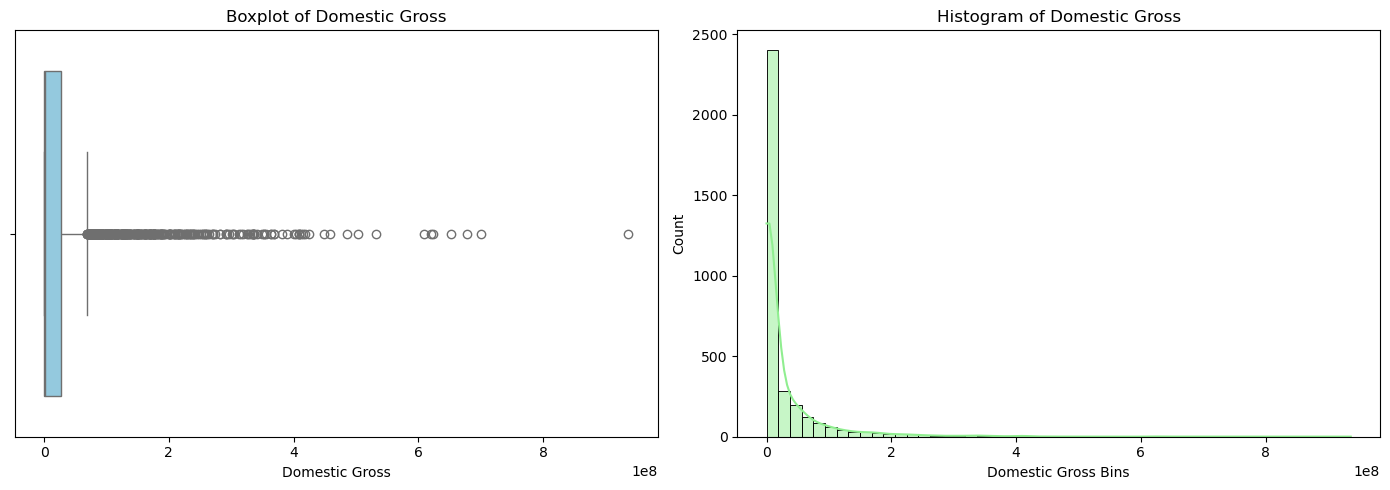

In [332]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize = (14, 5))

# Boxplot
sns.boxplot(data=gross_df, x='domestic_gross', ax = axes[0], color = 'skyblue')
axes[0].set_title("Boxplot of Domestic Gross")
axes[0].set_xlabel("Domestic Gross")

# Histogram with KDE
sns.histplot(data = gross_df, x = 'domestic_gross', bins=50, kde=True, ax = axes[1], color = 'lightgreen')
axes[1].set_title("Histogram of Domestic Gross")
axes[1].set_xlabel("Domestic Gross Bins")
plt.tight_layout()
plt.show()

#### 'foreign_gross' Column

In [333]:
# Preview rows with nulls in foreign_gross
gross_df.loc[gross_df['foreign_gross'].isna()].head()

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010


In [334]:
# Inspect unique values in foreign_gross
gross_df.loc[~gross_df['foreign_gross'].astype(str).str.replace(',', '').str.isnumeric(), 'foreign_gross'].unique()

array([nan, '1,131.6', '1,019.4', '1,163.0', '1,010.0', '1,369.5'],
      dtype=object)

In [335]:
# Imputation strategy:

# Coerce to numeric
gross_df['foreign_gross'] = pd.to_numeric(gross_df['foreign_gross'], errors='coerce')

# Impute median
median_foreign_gross = gross_df['foreign_gross'].median()
gross_df['foreign_gross'] = gross_df['foreign_gross'].fillna(median_foreign_gross)

# Preview changes
print("Null Values after imputation:", gross_df['foreign_gross'].isna().sum())

Null Values after imputation: 0


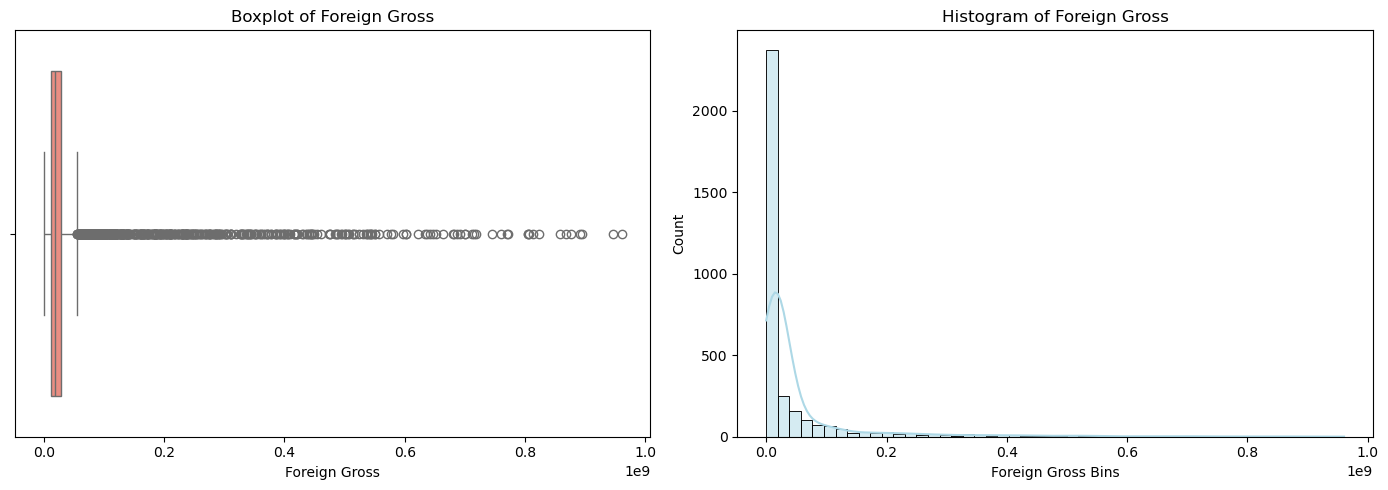

In [336]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize = (14, 5))

# Boxplot
sns.boxplot(data=gross_df, x='foreign_gross', ax = axes[0], color = 'salmon')
axes[0].set_title("Boxplot of Foreign Gross")
axes[0].set_xlabel("Foreign Gross")

# Histogram with KDE
sns.histplot(data = gross_df, x = 'foreign_gross', bins = 50, kde = True, ax = axes[1], color = 'lightblue')
axes[1].set_title("Histogram of Foreign Gross")
axes[1].set_xlabel("Foreign Gross Bins")
plt.tight_layout()
plt.show()

### OTLIER HANDLING IN GROSS DATASET

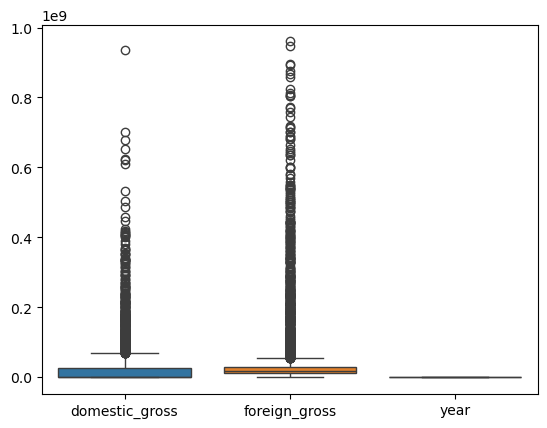

In [337]:
sns.boxplot(gross_df);

#### Comment on Outliers

> The boxplots for both **domestic** and **foreign gross** clearly reveal the presence of extreme outliers - films that have earned substantially more than the majority. In the movie industry, these are typically blockbuster titles, franchise installments, or globally viral releases with massive marketing budgets and wide theatrical distribution. These high-grossing films, while statistically extreme, represent genuine and meaningful data points.
>
> **Removing these outliers would strip away the very success stories we aim to emulate**. Therefore, we will **retain the outliers** in our analysis to ensure we capture the full spectrum of market performance and derive actionable insights from the most profitable examples.

### ROTTEN TOMATOES MOVIE INFORMATION DATASET

In [338]:
null_counts = rt_movies_df.isna().sum()
null_percentages = (null_counts / len(rt_movies_df)) * 100

null_df = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percentages.round(2)
})

print(null_df)

              Null Count  Null Percentage (%)
id                     0                 0.00
synopsis              62                 3.97
rating                 3                 0.19
genre                  8                 0.51
director             199                12.76
writer               449                28.78
theater_date         359                23.01
dvd_date             359                23.01
currency            1220                78.21
box_office          1220                78.21
runtime               30                 1.92
studio              1066                68.33


In [339]:
rt_movies_df.loc[rt_movies_df['genre'].isna()]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
10,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,289,NaN,NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95 minutes,NaN
250,327,"When a new robot, Raymond, defeats the three h...",NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13 minutes,NaN
658,843,Miners want to drill for billions of dollars w...,NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 minutes,NaN
1082,1393,Steven Seagal plays an expert sniper on a spec...,R,NaN,Fred Olen Ray,Fred Olen Ray,NaN,NaN,NaN,NaN,84 minutes,NaN
1342,1736,NaN,NR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1543,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
rt_movies_df.loc[rt_movies_df['rating'].isna()]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
10,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1543,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [341]:
rt_movies_df.loc[rt_movies_df['director'].isna()].head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
10,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,18,"In 1979, Bill Viola and Frank Caliguri dreamed...",NR,Documentary,NaN,Robert Zullo,NaN,NaN,NaN,NaN,NaN,Showtime Documentary Films
12,19,While Microsoft may be the biggest software co...,NR,Documentary|Special Interest,NaN,NaN,"Aug 23, 2002","Sep 30, 2003",NaN,NaN,90 minutes,Seventh Art Releasing
16,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",$,"99,165,609",129 minutes,Sony Pictures
20,27,NaN,NR,Musical and Performing Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [342]:
# Drop useless columns
rt_movies_df = rt_movies_df.drop(columns = [
    "studio",
    "dvd_date",
    "currency",
    "synopsis",
])

rt_movies_df = rt_movies_df.rename(columns = {"rating": "maturity_rating"})

# Drop useless rows
rt_movies_df = rt_movies_df.dropna(subset = ["maturity_rating", "genre"])

# Fill remaining categorical columns with 'unknows'
cat_cols = rt_movies_df.select_dtypes(include = ['object']).columns

for col in cat_cols:
   rt_movies_df[col].fillna('Unknown', inplace = True)

# Preview changes
rt_movies_df.isna().sum()

C:\Users\joshua\AppData\Local\Temp\ipykernel_14892\2391267605.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rt_movies_df[col].fillna('Unknown', inplace = True)


id                 0
maturity_rating    0
genre              0
director           0
writer             0
theater_date       0
box_office         0
runtime            0
dtype: int64

### HANDLING DUPLICATES 
#### 1. TMDB MOVIES

In [343]:
print("Duplicates before imputation:", tmdb_df.duplicated().sum())

tmdb_df = tmdb_df.drop_duplicates()
print("\nDuplicates after imputation:", tmdb_df.duplicated().sum())

Duplicates before imputation: 1020

Duplicates after imputation: 0


### HANDLING NUMERICAL VARIABLES

#### BUDGET DATASET

In [344]:
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [345]:
cols_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols_to_clean:
    budget_df[col] = (
        budget_df[col]
        .str.replace(r'[\$,]', '', regex = True) 
        .astype(float)                          
    )

budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [346]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


### GROSS DATASET

In [347]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


## IM.DB DATASET

In [348]:
import sqlite3

In [349]:
conn = sqlite3.connect(r'..\Raw_Data\im.db') 
cur = conn.cursor() 

In [350]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
cur.fetchall() 

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [351]:
moviebasics_df = pd.read_sql("""SELECT * FROM movie_basics""", conn)
moviebasics_df 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [352]:
# Get the movie_basics info 
moviebasics_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [353]:
# Get the number of rows and columns 
moviebasics_df.shape

(146144, 6)

In [354]:
#View the columns 
moviebasics_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [355]:
# Get the data types
moviebasics_df.dtypes

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [356]:
# Statistical summary
moviebasics_df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_year,146144.0,2014.621798,2.733583,2010.0,2012.0,2015.0,2017.0,2115.0
runtime_minutes,114405.0,86.187247,166.360590,1.0,70.0,87.0,99.0,51420.0


In [357]:
# Categorical Summary 
moviebasics_df.describe(include = 'O').T

,count,unique,top,freq
movie_id,146144,146144,tt0063540,1
primary_title,146144,136071,Home,24
original_title,146123,137773,Broken,19
genres,140736,1085,Documentary,32185


In [358]:
# Check for null values
moviebasics_df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [359]:
# Viewing null values in 'original_title'
moviebasics_df.loc[moviebasics_df['original_title'].isna()]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
39095,tt2397619,Woody Allen: A Documentary,None,2012,195.0,None
58624,tt3414266,The Outer Loop,None,2013,78.0,None
62944,tt3616658,The Hangman,None,2017,NaN,None
79274,tt4548042,Urban Legend: The Blind Side Strangler,None,2016,NaN,None
80116,tt4599436,Please Don't Eat the Pansies,None,2016,NaN,None
82058,tt4715728,Regen,None,2016,NaN,None
82308,tt4732998,Limbo,None,2017,NaN,None
85353,tt4940426,OldZilla,None,2018,NaN,None
104040,tt6092540,Rangreza,None,2017,NaN,None
104418,tt6107024,The Cage,None,2017,NaN,None


In [360]:
# Fill nulls in 'original_title' with 'primary_title'
moviebasics_df['original_title'] = moviebasics_df['original_title'].fillna(moviebasics_df['primary_title']) 
moviebasics_df['original_title'].isna().sum() 


0

In [361]:
# View null values in run_time_minutes
moviebasics_df.loc[moviebasics_df['runtime_minutes'].isna()]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
16,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,None
21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama"
...,...,...,...,...,...,...
146131,tt9915790,Bobbyr Bondhura,Bobbyr Bondhura,2019,NaN,Family
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [362]:
 #Convert to numeric just in case
moviebasics_df['runtime_minutes'] = pd.to_numeric(moviebasics_df['runtime_minutes'], errors='coerce')

# Fill null values in runtime_minutes with the median
moviebasics_df['runtime_minutes'].fillna(moviebasics_df['runtime_minutes'].median, inplace = True)
moviebasics_df['runtime_minutes'].isna().sum() 

C:\Users\joshua\AppData\Local\Temp\ipykernel_14892\47456649.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0         175.0
1         114.0
2         122.0
3           NaN
4          80.0
          ...  
146139    123.0
146140      NaN
146141      NaN
146142    116.0
146143      NaN
Name: runtime_minutes, Length: 146144, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  moviebasics_df['runtime_minutes'].fillna(moviebasics_df['runtime_minutes'].median, inplace = True)


0

In [363]:
# eplace Null in genres with unknown
moviebasics_df['genres'] = moviebasics_df['genres'].fillna('Unknown')

In [364]:
moviebasics_df.duplicated().sum()

0

In [365]:
# Load movie_ratings table 
movieratings_df = pd.read_sql("""SELECT * FROM movie_ratings""", conn)
movieratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [366]:
# Check for rows and  columns
movieratings_df.shape

(73856, 3)

In [367]:
# Check for column names
movieratings_df.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [368]:
# Check for data types 
movieratings_df.dtypes

movie_id          object
averagerating    float64
numvotes           int64
dtype: object

In [369]:
# Statistical summary
movieratings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
averagerating,73856.0,6.332729,1.474978,1.0,5.5,6.5,7.4,10.0
numvotes,73856.0,3523.662167,30294.022971,5.0,14.0,49.0,282.0,1841066.0


In [370]:
# Categorical Summary 
movieratings_df.describe(include = 'O').T

,count,unique,top,freq
movie_id,73856,73856,tt10356526,1


In [371]:
# Check for null values 
movieratings_df.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [372]:
# Check for duplicates 
movieratings_df.duplicated().sum()

0

In [373]:
print(movieratings_df.columns)

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')


In [374]:
print(moviebasics_df.columns)

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')


In [375]:
moviebasics_df['movie_id'].head()

0    tt0063540
1    tt0066787
2    tt0069049
3    tt0069204
4    tt0100275
Name: movie_id, dtype: object

In [376]:
movieratings_df['movie_id'].head()

0    tt10356526
1    tt10384606
2     tt1042974
3     tt1043726
4     tt1060240
Name: movie_id, dtype: object

In [377]:
q = """
SELECT 
    mb.movie_id,
    mb.primary_title,
    mb.original_title,
    mb.start_year,
    mb.runtime_minutes,
    mb.genres,
    mr.averagerating,
    mr.numvotes
FROM movie_basics mb
INNER JOIN movie_ratings mr ON mb.movie_id = mr.movie_id;
"""

movies_df = pd.read_sql(q, conn)
movies_df.head() 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [378]:
movies_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [379]:
null_counts = movies_df.isna().sum()
null_percentages = (null_counts / len(movies_df)) * 100

null_df = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percentages.round(2)
})

print(null_df)

                 Null Count  Null Percentage (%)
movie_id                  0                 0.00
primary_title             0                 0.00
original_title            0                 0.00
start_year                0                 0.00
runtime_minutes        7620                10.32
genres                  804                 1.09
averagerating             0                 0.00
numvotes                  0                 0.00


In [380]:
#Convert to numeric just in case
movies_df['runtime_minutes'] = pd.to_numeric(movies_df['runtime_minutes'], errors='coerce')

# Fill null values in runtime_minutes with the median
movies_df['runtime_minutes'].fillna(movies_df['runtime_minutes'].median, inplace = True)
movies_df['runtime_minutes'].isna().sum() 

C:\Users\joshua\AppData\Local\Temp\ipykernel_14892\3586092888.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0        175.0
1        114.0
2        122.0
3          NaN
4         80.0
         ...  
73851     75.0
73852     98.0
73853      NaN
73854      NaN
73855     72.0
Name: runtime_minutes, Length: 73856, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  movies_df['runtime_minutes'].fillna(movies_df['runtime_minutes'].median, inplace = True)


0

In [383]:
# Drop null values in 'genres'
movies_df = movies_df.dropna(subset=['genres'])

# Preview changes
movies_df.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [384]:
movies_df.shape

(73052, 8)

## EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS